In [1]:
from epmld.benchmark import generate_detector_error_model, LogicalErrorExpectationBenchmark, generate_all_possible_syndromes

In [30]:
d = 3
# r = 3
r= 1

probabilities = [0.01, 0.1, 0.5, 1, 10, 20, 40, 60, 80, 
                 100, 150, 200, 250, 300, 310, 320, 330, 340, 350, 400, 450, 
                 500, 550, 600, 650, 700, 750, 800, 850, 
                 900, 950, 1000]
p = 100
noise_model = "si1000"
error_type = "Z"
# decomposed_error = False
# have_stabilizer = False
have_stabilizer = True
# related_path = "/home/normaluser/ck/epmld/data/external/epmld_experiment_data/epmld_paper_experiment/overall_performance/surface_code"
related_path = "/home/normaluser/ck/epmld/data/external/epmld_experiment_data/epmld_paper_experiment/degeneracy/surface_code"
# /home/normaluser/ck/epmld/data/external/epmld_experiment_data/experiment_4_mwpm_error
dem = generate_detector_error_model(d, r, p, noise_model, error_type, False, related_path, have_stabilizer)
all_syndrome = generate_all_possible_syndromes(d, r, have_stabilizer)

print(len(all_syndrome))

256


In [31]:
import epmld
import pymatching
import numpy as np
diff_logical_error_probs = []
error_decoder_syndrome_probs = []
epmld_errors = []
logical_error_rates = []
for p in probabilities:
    total_diff_logical_error_prob = 0
    total_error_decoder_syndrome_prob = 0
    total_logical_error_rates = 0
    for error_type in ["X", "Z"]:
        dem = generate_detector_error_model(d, r, p, noise_model, error_type, False, related_path, have_stabilizer)
        epmld_decoder = epmld.EPMLD(detector_error_model=dem, order_method='greedy', 
                                slice_method='no_slice', 
                                is_look_up_table=False, use_decimal = True,
                                contraction_code = "cpp")

        epmld_benchmark = LogicalErrorExpectationBenchmark(
            decoder_function=epmld_decoder,
            d=d,
            r=r,
            p=p,
            noise_model=noise_model,
            error_type=error_type,
        )

        logical_error_rate, _ = epmld_benchmark.run(have_stabilizer)

        decomposed_dem = generate_detector_error_model(d, r, p, noise_model, error_type, True, related_path, have_stabilizer)
        mwpm_decoder = pymatching.Matching.from_detector_error_model(decomposed_dem)
        mwpm_benchmark = LogicalErrorExpectationBenchmark(
            decoder_function=mwpm_decoder,
            d=d,
            r=r,
            p=p,
            noise_model=noise_model,
            error_type=error_type,
        )

        mwpm_benchmark.run(have_stabilizer)
        
        epmld_error = sum(epmld_benchmark.predicted_observables)
        epmld_errors.append(epmld_error)
        # all_syndrome[]
        unequal_indices = np.where(epmld_benchmark.predicted_observables.astype(np.uint8) != mwpm_benchmark.predicted_observables.astype(np.uint8))[0]
        # print(unequal_indices)
        # print(f"MWPM解码错误 syndrome 数量: {len(unequal_indices)}")
        unequal_syndrome = all_syndrome[unequal_indices, :]
        unequal_syndrome_prob_dists = epmld_benchmark.prob_dists[unequal_indices, :]
        # print(unequal_syndrome_prob_dists)
        abs_differences = np.abs(unequal_syndrome_prob_dists[:, 0] - unequal_syndrome_prob_dists[:, 1])
        diff_logical_error_prob = np.sum(abs_differences)
        diff_logical_error_prob = np.sum(abs_differences)
        error_decoder_syndrome_prob = np.sum(unequal_syndrome_prob_dists)

        total_diff_logical_error_prob += diff_logical_error_prob
        total_error_decoder_syndrome_prob += error_decoder_syndrome_prob
        total_logical_error_rates += logical_error_rate

        print(f"--------p = {p} error_type = {error_type}---------------")

    # 取平均后保存
    diff_logical_error_probs.append(total_diff_logical_error_prob / 2)
    error_decoder_syndrome_probs.append(total_error_decoder_syndrome_prob / 2)
    logical_error_rates.append(total_logical_error_rates / 2)
    # print(f"MWPM解码出错导致的期望逻辑错误率提升: {diff_logical_error_prob}")
    # print(f"出现MWPM解码出错的syndrome的概率: {error_decoder_syndrome_prob}")

--------p = 0.01 error_type = X---------------
--------p = 0.01 error_type = Z---------------
--------p = 0.1 error_type = X---------------
--------p = 0.1 error_type = Z---------------
--------p = 0.5 error_type = X---------------
--------p = 0.5 error_type = Z---------------
--------p = 1 error_type = X---------------
--------p = 1 error_type = Z---------------
--------p = 10 error_type = X---------------
--------p = 10 error_type = Z---------------
--------p = 20 error_type = X---------------
--------p = 20 error_type = Z---------------
--------p = 40 error_type = X---------------
--------p = 40 error_type = Z---------------
--------p = 60 error_type = X---------------
--------p = 60 error_type = Z---------------
--------p = 80 error_type = X---------------
--------p = 80 error_type = Z---------------
--------p = 100 error_type = X---------------
--------p = 100 error_type = Z---------------
--------p = 150 error_type = X---------------
--------p = 150 error_type = Z---------------


In [32]:
print(diff_logical_error_probs)
print(error_decoder_syndrome_probs)
print(epmld_errors)
print(logical_error_rates)

[np.longdouble('4.228184965176271052e-12'), np.longdouble('4.2218531872134453173e-10'), np.longdouble('1.0484469644218116183e-08'), np.longdouble('4.158879998184219712e-08'), np.longdouble('3.5626087029408242044e-06'), np.longdouble('1.2687435412076859405e-05'), np.longdouble('4.3131431857339659708e-05'), np.longdouble('0.000105530200818346316527'), np.longdouble('0.00022900356845553640224'), np.longdouble('0.00036775059604289471097'), np.longdouble('0.002520447214129322988'), np.longdouble('0.0026707780458636483469'), np.longdouble('0.0026257862419746589304'), np.longdouble('0.0021601581367177613335'), np.longdouble('0.0021121521887606821817'), np.longdouble('0.00084045926717861928044'), np.longdouble('0.000849700966854630225'), np.longdouble('0.005222507039354632473'), np.longdouble('0.00489029401691133339'), np.longdouble('0.0039850821126592952433'), np.longdouble('0.0056018963622614829988'), np.longdouble('0.0036258294038604067962'), np.longdouble('0.0028861809797911118676'), np.lo

结论一：

在不考虑数据比特的情况下：
* 在r=1的情况下，不管是什么噪声参数和什么纠错码大小，MWPM和MLD都会默认将其解码为False。这个的概率是最大的。
* 在r!=1的情况下，不能判断是简并性问题还是超图分解的问题，因为会出现超边。

在考虑数据比特的情况下：
* 在r=1的情况下，MWPM和MLD也存在简并性的问题。
* 在存在数据比特解码，数据比特测量没有噪声的情况下，随着噪声的增加，简并性增大。

[np.longdouble('6.0444256199329924495e-13'), np.longdouble('6.04425644458763229e-11'), np.longdouble('1.5108771442501062004e-09'), np.longdouble('6.042583018973146172e-09'), np.longdouble('6.02763535776920272e-07'), np.longdouble('1.4700956379586594507e-05'), np.longdouble('5.7065291708600043167e-05'), np.longdouble('0.00012458359153807978593'), np.longdouble('0.00021487517343355514619'), np.longdouble('0.00032568484791804124312'), np.longdouble('0.0011588454033739035451'), np.longdouble('0.009980102267899681544'), np.longdouble('0.026209884825717475092')]
[np.longdouble('2.5956664219637334791e-12'), np.longdouble('2.5966639303364751147e-10'), np.longdouble('6.5027282348158010767e-09'), np.longdouble('2.606611713735787751e-08'), np.longdouble('2.7033928203235129764e-06'), np.longdouble('3.4283345530663512788e-05'), np.longdouble('0.00013464665692055775684'), np.longdouble('0.00029745406927310255621'), np.longdouble('0.00051919427147022960327'), np.longdouble('0.0007964789810934823447'), np.longdouble('0.003059685738145287885'), np.longdouble('0.037451216877370275697'), np.longdouble('0.13426690144708635517')]
[array([69]), array([69]), array([69]), array([69]), array([69]), array([72]), array([72]), array([72]), array([72]), array([72]), array([72]), array([71]), array([69])]
* 考虑数据比特的测量噪声，简并性更小？

In [38]:
diff_logical_error_probs[4]/logical_error_rates[4]

np.longdouble('0.0040932866516713725216')

/tmp/ipykernel_1810013/4101431298.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


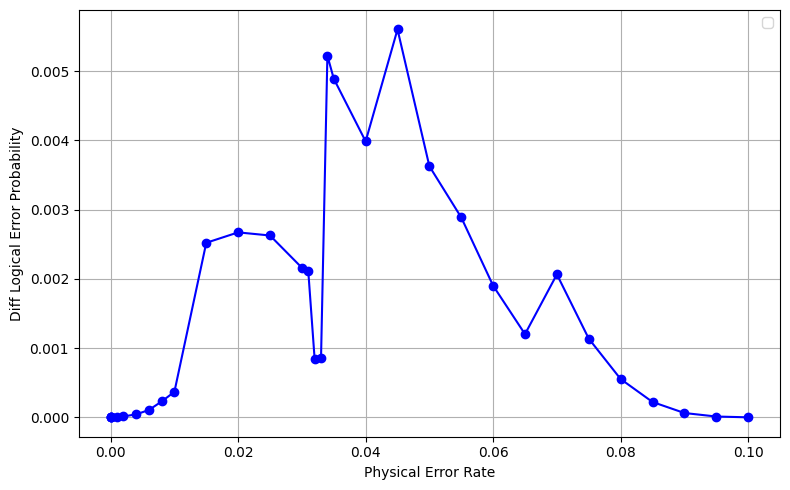

In [5]:
import matplotlib.pyplot as plt

# 横坐标原始数据
probabilities = [0.01, 0.1, 0.5, 1, 10, 20, 40, 60, 80, 
                 100, 150, 200, 250, 300, 310, 320, 330, 340, 350, 400, 450, 
                 500, 550, 600, 650, 700, 750, 800, 850, 
                 900, 950, 1000]
# 将横坐标除以 10^4
x = [p / 1e4 for p in probabilities]

# 示例纵坐标数据（请用你的实际数据替换这行）
diff_logical_error_probs = diff_logical_error_probs

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(x, diff_logical_error_probs, marker='o', linestyle='-', color='b')

# 添加标题和标签
# plt.title('Difference in Logical Error Probability vs. Physical Error Rate')
plt.xlabel('Physical Error Rate')
plt.ylabel('Diff Logical Error Probability')
plt.grid(True)
plt.legend()
plt.tight_layout()

# 显示图像
plt.show()


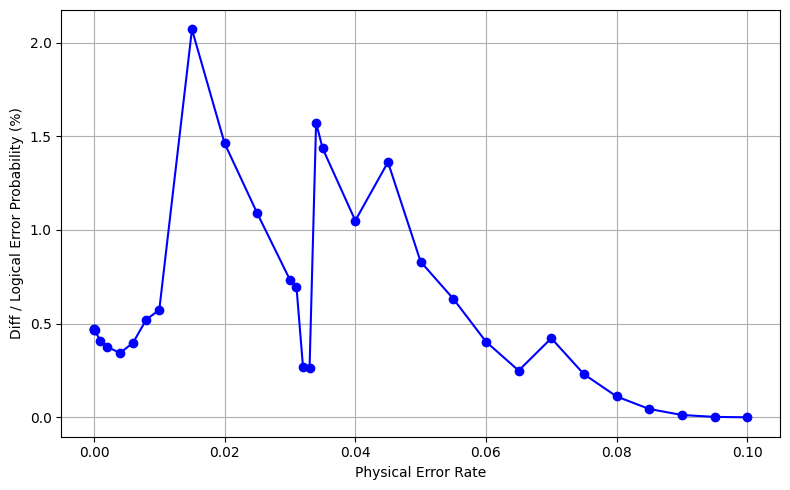

In [37]:
import matplotlib.pyplot as plt

# 横坐标原始数据
probabilities = [0.01, 0.1, 0.5, 1, 10, 20, 40, 60, 80, 
                 100, 150, 200, 250, 300, 310, 320, 330, 340, 350, 400, 450, 
                 500, 550, 600, 650, 700, 750, 800, 850, 
                 900, 950, 1000]
x = [p / 1e4 for p in probabilities]

# 假设这两个变量已定义，长度与 x 相同
# diff_logical_error_probs = [...]
# logical_error_rates = [...]

# 计算比值，避免除以零
ratio = [d / l *100 if l != 0 else 0 for d, l in zip(diff_logical_error_probs, logical_error_rates)]

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(x, ratio, marker='o', linestyle='-', color='b')

# 添加标签
plt.xlabel('Physical Error Rate')
plt.ylabel('Diff / Logical Error Probability (%)')
plt.grid(True)
plt.tight_layout()

# 显示图像
plt.show()


分别存储

In [25]:
related_path = "/home/normaluser/ck/epmld/data/external/epmld_experiment_data/epmld_paper_experiment/degeneracy/surface_code"

probabilities = [0.01, 0.1, 0.5, 1, 10, 20, 40, 60, 80, 
                 100, 150, 200, 250, 300, 310, 320, 330, 340, 350, 400, 450, 
                 500, 550, 600, 650, 700, 750, 800, 850, 
                 900, 950, 1000]

diff_logical_error_probs_X = []
diff_logical_error_probs_Z = []
error_decoder_syndrome_probs_X = []
error_decoder_syndrome_probs_Z = []
epmld_errors = []

for p in probabilities:
    for error_type in ["X", "Z"]:
        dem = generate_detector_error_model(d, r, p, noise_model, error_type, False, related_path, have_stabilizer)
        epmld_decoder = epmld.EPMLD(detector_error_model=dem, order_method='greedy', 
                                    slice_method='no_slice', 
                                    is_look_up_table=False, use_decimal = True,
                                    contraction_code = "cpp")

        epmld_benchmark = LogicalErrorExpectationBenchmark(
            decoder_function=epmld_decoder,
            d=d,
            r=r,
            p=p,
            noise_model=noise_model,
            error_type=error_type,
        )

        epmld_benchmark.run(have_stabilizer)

        decomposed_dem = generate_detector_error_model(d, r, p, noise_model, error_type, True, related_path, have_stabilizer)
        mwpm_decoder = pymatching.Matching.from_detector_error_model(decomposed_dem)
        mwpm_benchmark = LogicalErrorExpectationBenchmark(
            decoder_function=mwpm_decoder,
            d=d,
            r=r,
            p=p,
            noise_model=noise_model,
            error_type=error_type,
        )

        mwpm_benchmark.run(have_stabilizer)

        epmld_error = sum(epmld_benchmark.predicted_observables)
        epmld_errors.append(epmld_error)

        unequal_indices = np.where(epmld_benchmark.predicted_observables.astype(np.uint8) != mwpm_benchmark.predicted_observables.astype(np.uint8))[0]
        unequal_syndrome = all_syndrome[unequal_indices, :]
        unequal_syndrome_prob_dists = epmld_benchmark.prob_dists[unequal_indices, :]
        abs_differences = np.abs(unequal_syndrome_prob_dists[:, 0] - unequal_syndrome_prob_dists[:, 1])

        diff_logical_error_prob = np.sum(abs_differences)
        error_decoder_syndrome_prob = np.sum(unequal_syndrome_prob_dists)

        # 分别存储 X / Z 的值
        if error_type == "X":
            diff_logical_error_probs_X.append(diff_logical_error_prob)
            error_decoder_syndrome_probs_X.append(error_decoder_syndrome_prob)
        else:
            diff_logical_error_probs_Z.append(diff_logical_error_prob)
            error_decoder_syndrome_probs_Z.append(error_decoder_syndrome_prob)

        print(f"--------p = {p} error_type = {error_type}---------------")


--------p = 0.01 error_type = X---------------
--------p = 0.01 error_type = Z---------------
--------p = 0.1 error_type = X---------------
--------p = 0.1 error_type = Z---------------
--------p = 0.5 error_type = X---------------
--------p = 0.5 error_type = Z---------------
--------p = 1 error_type = X---------------
--------p = 1 error_type = Z---------------
--------p = 10 error_type = X---------------
--------p = 10 error_type = Z---------------
--------p = 20 error_type = X---------------
--------p = 20 error_type = Z---------------
--------p = 40 error_type = X---------------
--------p = 40 error_type = Z---------------
--------p = 60 error_type = X---------------
--------p = 60 error_type = Z---------------
--------p = 80 error_type = X---------------
--------p = 80 error_type = Z---------------
--------p = 100 error_type = X---------------
--------p = 100 error_type = Z---------------
--------p = 150 error_type = X---------------
--------p = 150 error_type = Z---------------


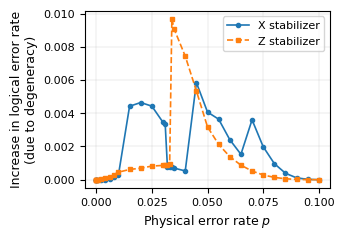

In [26]:
import matplotlib.pyplot as plt

# 原始概率（横坐标）
probabilities = [0.01, 0.1, 0.5, 1, 10, 20, 40, 60, 80, 
                 100, 150, 200, 250, 300, 310, 320, 330, 340, 350, 400, 450, 
                 500, 550, 600, 650, 700, 750, 800, 850, 
                 900, 950, 1000]
x_vals = [p / 1e4 for p in probabilities]

# 示例数据（请替换为实际数据）
# diff_logical_error_probs_X = [...]
# diff_logical_error_probs_Z = [...]

# 画图
plt.figure(figsize=(3.5, 2.5))  # 适合论文列宽（单位英寸）
plt.plot(x_vals, diff_logical_error_probs_X, marker='o', markersize=3, linewidth=1.2,
         linestyle='-', color='#1f77b4', label='X stabilizer')  # 深蓝
plt.plot(x_vals, diff_logical_error_probs_Z, marker='s', markersize=3, linewidth=1.2,
         linestyle='--', color='#ff7f0e', label='Z stabilizer')  # 橙色

# 坐标轴标签
plt.xlabel('Physical error rate $p$', fontsize=9)
plt.ylabel('Increase in logical error rate\n(due to degeneracy)', fontsize=9)

# 美化
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linewidth=0.3, alpha=0.6)
plt.legend(fontsize=8, frameon=True, loc='upper right')
plt.tight_layout()

# 显示图像
# plt.show()

plt.savefig("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/degeneracy/logical_error_increase.pdf", dpi=300, bbox_inches='tight')

[np.longdouble('7.79912925154706884e-12'),
 np.longdouble('7.791296013089570964e-10'),
 np.longdouble('1.9391390137352267919e-08'),
 np.longdouble('7.713301680946781417e-08'),
 np.longdouble('6.9664042039777389323e-06'),
 np.longdouble('2.481523066002414269e-05'),
 np.longdouble('8.270876563085755578e-05'),
 np.longdouble('0.00016439061807965981288'),
 np.longdouble('0.00031066105338396439153'),
 np.longdouble('0.00045139002902685149156'),
 np.longdouble('0.0006155393699364449227'),
 np.longdouble('0.00069246579994489320184'),
 np.longdouble('0.000819276100971361271'),
 np.longdouble('0.00085961182562754862154'),
 np.longdouble('0.00088356716001975733833'),
 np.longdouble('0.0009112859857156753842'),
 np.longdouble('0.0009369549779465973611'),
 np.longdouble('0.0096910267344616699405'),
 np.longdouble('0.009082154630437177747'),
 np.longdouble('0.0074432143082548858897'),
 np.longdouble('0.005352341195169493023'),
 np.longdouble('0.0031788366342679672915'),
 np.longdouble('0.0021264845

基于别人的SI1000的surface code进行修改的，一致的，说明我们的生成没有错误。

In [8]:
# related_path = "/home/normaluser/ck/epmld/data/external/epmld_experiment_data/experiment_4_mwpm_error"

# diff_logical_error_probs_X = []
# diff_logical_error_probs_Z = []
# error_decoder_syndrome_probs_X = []
# error_decoder_syndrome_probs_Z = []
# epmld_errors = []

# for p in probabilities:
#     for error_type in ["X", "Z"]:
#         dem = generate_detector_error_model(d, r, p, noise_model, error_type, False, related_path, have_stabilizer)
#         epmld_decoder = epmld.EPMLD(detector_error_model=dem, order_method='greedy', 
#                                     slice_method='no_slice', 
#                                     is_look_up_table=False, use_decimal = True,
#                                     contraction_code = "cpp")

#         epmld_benchmark = LogicalErrorExpectationBenchmark(
#             decoder_function=epmld_decoder,
#             d=d,
#             r=r,
#             p=p,
#             noise_model=noise_model,
#             error_type=error_type,
#         )

#         epmld_benchmark.run(have_stabilizer)

#         decomposed_dem = generate_detector_error_model(d, r, p, noise_model, error_type, True, related_path, have_stabilizer)
#         mwpm_decoder = pymatching.Matching.from_detector_error_model(decomposed_dem)
#         mwpm_benchmark = LogicalErrorExpectationBenchmark(
#             decoder_function=mwpm_decoder,
#             d=d,
#             r=r,
#             p=p,
#             noise_model=noise_model,
#             error_type=error_type,
#         )

#         mwpm_benchmark.run(have_stabilizer)

#         epmld_error = sum(epmld_benchmark.predicted_observables)
#         epmld_errors.append(epmld_error)

#         unequal_indices = np.where(epmld_benchmark.predicted_observables.astype(np.uint8) != mwpm_benchmark.predicted_observables.astype(np.uint8))[0]
#         unequal_syndrome = all_syndrome[unequal_indices, :]
#         unequal_syndrome_prob_dists = epmld_benchmark.prob_dists[unequal_indices, :]
#         abs_differences = np.abs(unequal_syndrome_prob_dists[:, 0] - unequal_syndrome_prob_dists[:, 1])

#         diff_logical_error_prob = np.sum(abs_differences)
#         error_decoder_syndrome_prob = np.sum(unequal_syndrome_prob_dists)

#         # 分别存储 X / Z 的值
#         if error_type == "X":
#             diff_logical_error_probs_X.append(diff_logical_error_prob)
#             error_decoder_syndrome_probs_X.append(error_decoder_syndrome_prob)
#         else:
#             diff_logical_error_probs_Z.append(diff_logical_error_prob)
#             error_decoder_syndrome_probs_Z.append(error_decoder_syndrome_prob)

#         print(f"--------p = {p} error_type = {error_type}---------------")


In [9]:
# import matplotlib.pyplot as plt

# # 原始概率（示例）
# probabilities = [0.01, 0.1, 0.5, 1, 10, 20, 40, 60, 80, 
#                  100, 150, 200, 250, 300, 350, 400, 450, 
#                  500, 550, 600, 650, 700, 750, 800, 850, 
#                  900, 950, 1000]
# x_vals = [p / 1e4 for p in probabilities]

# # 示例数据：替换为你实际运行后得到的列表
# # diff_logical_error_probs_X = [...]
# # diff_logical_error_probs_Z = [...]

# # 画图
# plt.figure(figsize=(8, 5))
# plt.plot(x_vals, diff_logical_error_probs_X, marker='o', linestyle='-', color='blue', label='X-type error')
# plt.plot(x_vals, diff_logical_error_probs_Z, marker='s', linestyle='--', color='red', label='Z-type error')

# # 添加标签和图例
# plt.xlabel('Physical Error Rate (p / 10⁴)')
# plt.ylabel('Δ Logical Error Probability')
# plt.title('Difference in Logical Error Probability (X vs Z)')
# plt.grid(True)
# plt.legend()
# plt.tight_layout()

# # 显示图像
# plt.show()


数据比特没有噪声。

In [22]:
related_path = "/home/normaluser/ck/epmld/data/external/epmld_experiment_data/epmld_paper_experiment/degeneracy/surface_code_without_data_noise"

diff_logical_error_probs_X = []
diff_logical_error_probs_Z = []
error_decoder_syndrome_probs_X = []
error_decoder_syndrome_probs_Z = []
epmld_errors = []
probabilities = [0.01, 0.1, 0.5, 1, 10, 20, 40, 60, 80, 
                100, 200, 300, 400, 
                500, 600, 700, 800, 
                900, 1000,1100,1200,1300,1400, 1500, 1600,1700,1800,1900, 2000]

for p in probabilities:
    for error_type in ["X", "Z"]:
        dem = generate_detector_error_model(d, r, p, noise_model, error_type, False, related_path, have_stabilizer)
        epmld_decoder = epmld.EPMLD(detector_error_model=dem, order_method='greedy', 
                                    slice_method='no_slice', 
                                    is_look_up_table=False, use_decimal = True,
                                    contraction_code = "cpp")

        epmld_benchmark = LogicalErrorExpectationBenchmark(
            decoder_function=epmld_decoder,
            d=d,
            r=r,
            p=p,
            noise_model=noise_model,
            error_type=error_type,
        )

        epmld_benchmark.run(have_stabilizer)

        decomposed_dem = generate_detector_error_model(d, r, p, noise_model, error_type, True, related_path, have_stabilizer)
        mwpm_decoder = pymatching.Matching.from_detector_error_model(decomposed_dem)
        mwpm_benchmark = LogicalErrorExpectationBenchmark(
            decoder_function=mwpm_decoder,
            d=d,
            r=r,
            p=p,
            noise_model=noise_model,
            error_type=error_type,
        )

        mwpm_benchmark.run(have_stabilizer)

        epmld_error = sum(epmld_benchmark.predicted_observables)
        epmld_errors.append(epmld_error)

        unequal_indices = np.where(epmld_benchmark.predicted_observables.astype(np.uint8) != mwpm_benchmark.predicted_observables.astype(np.uint8))[0]
        unequal_syndrome = all_syndrome[unequal_indices, :]
        unequal_syndrome_prob_dists = epmld_benchmark.prob_dists[unequal_indices, :]
        abs_differences = np.abs(unequal_syndrome_prob_dists[:, 0] - unequal_syndrome_prob_dists[:, 1])

        diff_logical_error_prob = np.sum(abs_differences)
        error_decoder_syndrome_prob = np.sum(unequal_syndrome_prob_dists)

        # 分别存储 X / Z 的值
        if error_type == "X":
            diff_logical_error_probs_X.append(diff_logical_error_prob)
            error_decoder_syndrome_probs_X.append(error_decoder_syndrome_prob)
        else:
            diff_logical_error_probs_Z.append(diff_logical_error_prob)
            error_decoder_syndrome_probs_Z.append(error_decoder_syndrome_prob)

        print(f"--------p = {p} error_type = {error_type}---------------")


--------p = 0.01 error_type = X---------------
--------p = 0.01 error_type = Z---------------
--------p = 0.1 error_type = X---------------
--------p = 0.1 error_type = Z---------------
--------p = 0.5 error_type = X---------------
--------p = 0.5 error_type = Z---------------
--------p = 1 error_type = X---------------
--------p = 1 error_type = Z---------------
--------p = 10 error_type = X---------------
--------p = 10 error_type = Z---------------
--------p = 20 error_type = X---------------
--------p = 20 error_type = Z---------------
--------p = 40 error_type = X---------------
--------p = 40 error_type = Z---------------
--------p = 60 error_type = X---------------
--------p = 60 error_type = Z---------------
--------p = 80 error_type = X---------------
--------p = 80 error_type = Z---------------
--------p = 100 error_type = X---------------
--------p = 100 error_type = Z---------------
--------p = 200 error_type = X---------------
--------p = 200 error_type = Z---------------


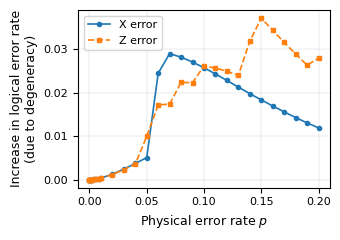

In [23]:
import matplotlib.pyplot as plt

# 原始概率（横坐标）
probabilities = [0.01, 0.1, 0.5, 1, 10, 20, 40, 60, 80, 
                100, 200, 300, 400, 
                500, 600, 700, 800, 
                900, 1000,1100,1200,1300,1400, 1500, 1600,1700,1800,1900, 2000]
x_vals = [p / 1e4 for p in probabilities]

# 示例数据（请替换为实际数据）
# diff_logical_error_probs_X = [...]
# diff_logical_error_probs_Z = [...]

# 画图
plt.figure(figsize=(3.5, 2.5))  # 适合论文列宽（单位英寸）
plt.plot(x_vals, diff_logical_error_probs_X, marker='o', markersize=3, linewidth=1.2,
         linestyle='-', color='#1f77b4', label='X error')  # 深蓝
plt.plot(x_vals, diff_logical_error_probs_Z, marker='s', markersize=3, linewidth=1.2,
         linestyle='--', color='#ff7f0e', label='Z error')  # 橙色

# 坐标轴标签
plt.xlabel('Physical error rate $p$', fontsize=9)
plt.ylabel('Increase in logical error rate\n(due to degeneracy)', fontsize=9)

# 美化
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linewidth=0.3, alpha=0.6)
plt.legend(fontsize=8, frameon=True, loc='upper left')
plt.tight_layout()

# 显示图像
plt.show()

# plt.savefig("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/degeneracy/logical_error_increase.pdf", dpi=300, bbox_inches='tight')